# Introduction

The Viola–Jones object detection framework is a machine learning object detection framework proposed in 2001 by Paul Viola and Michael Jones. It was motivated primarily by the problem of face detection, although it can be adapted to the detection of other object classes.

In the following section we will see Python classes and their use cases in Voila-Jones face detection model using haarcascade classifiers

After going through the notebook you'll know:

* Why python classes are important and how it is used
* How to define and instantiate a class and its set attributes
* How to create methods and pass its arguments

In [1]:
#import all necessary packages(numpy,cv2 anf if using colab (cv2_imshow))
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Understanding what a class is



In python(object oriented languages-->where every physical entity can be treated as objects),Classes are the fundamental building blocks.

**Creating a new class creates a new object ,where every class instance can be charecterized by its attributes to miantain its state and methods to modify its state ** .


---


complicated words?

Let me break that to you with a simple example

For example, if you are interested in building houses, you can create a class called “House” that defines the properties and behaviors of a house. The properties could include things like the number of bedrooms, bathrooms, and square footage, while the behaviors could include things like opening and closing doors and windows.

Once you have defined the “House” class, you can create multiple instances(i.e, building multiple houses with the same blueprint) of it, each with its own unique set of property values. For example, you could create one instance of the “House” class that has three bedrooms and two bathrooms, and another instance that has four bedrooms and three bathrooms.

Each instance of the “House” class can be characterized by its attributes, which are the specific property values that define it. For example, an instance of the “House” class with four bedrooms and three bathrooms would have different attributes than an instance with three bedrooms and two bathrooms.

You can also use methods to modify the state of each instance of the “House” class. For example, you could create a method called “paint” that changes the color of the house, or a method called “addRoom” that adds a new room to the house.

# Defining a class

The *class* keyword  allows for the creation of new class ,immediately followed by  the class name



```
# class Myclass:
    pass
```
similarly we are creating class for face detection using Viola-Jones
the class name is voila



```
# class Voila:
    <statements>
```




# Instatiation and Attribute features

Instantiation refers to creation of new instance of a class

To create new instance of a class wen can call it using class name and assign it to a variable .

This will create a new empty class object.



```
  class Voila:
      pass

# object=Voila()
```

Upon creating a new instance/object of the class ,Python calls its object *constructur* method   __init()__   ,which often takes arguments that are used to set the instantiated objects attributes

* We can define this constructor method in our class just like a function and specify attributes that will need to be passed when instantiating object

Example:
Lets say we need to define a class called House:

(Immediately create an object for the class ,use this method anytime you code .
as soon as you create class,create its object)


```
# class House:
       def __init()__(self, kitchen, living_room):

           self.kitchen=kitchen
           self.living_room=living_room
  
  object=House()

```
Here the constructor method takes two arguments called kitchen and living_room which can be passed upon after instantiating an object

In the above example kitchen and living room are considered as instance variables.Meaning, because they are bound to specific instance (i.e, a particular house )
This means such attributes belong only to the object which they have been set
but not to any other object from the same class







Now, if the attribute is created within the class and is shared by all instances of the same class then such variable is called as class variable


example:

Here members is a class variable
```
# Class House:
    members='family of 4'

    def __init__(self,kitchen,living_room)
        self.kitchen=kitchen
        self.living_room=living_room

  object=House()
```
similarly, we create a function to read and show the image in class voila with path as class variable

Note to remember:
* The first argument of the constructor method or any othermethod is often called self.This argument refers to the object that we are in process of creating.It is a good practise to follow the covection of setting the first argument to the self keyword  to ensure the readability of the code for other programmers

* Once the objects attributes are set  they can be accessed using the dot operator
   * object=Voila(Voila.path)


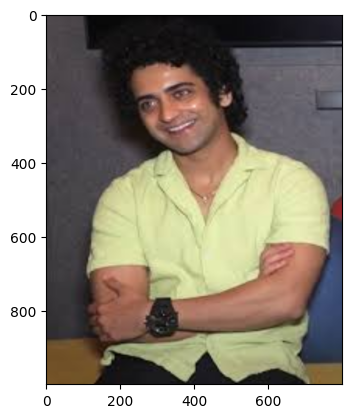

In [2]:
class Voila():
  path='/content/drive/MyDrive/VT/voila jones/sumed.jpeg'
  def __init__(self,path):
     self.path=path
     self.image=cv2.imread(self.path,1) #use 1 for color images and zero for greyscale images
     self.image=cv2.resize(self.image,(800,1000))   # change the image shape
     plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)) # open cv uses BGR format using matplotlib read the images  and converrt it to rgb
     plt.show()

obj=Voila(Voila.path)


# Creating methods and passing arguments

* In addition to constructors ,a class object can have multiple methods(or functionalities).

* The syntax to create another instance method is similar to that of constructor method
   * Each of these instance methods can take several arguments with first argument being self, that lets us set and access object attributes


----------
2


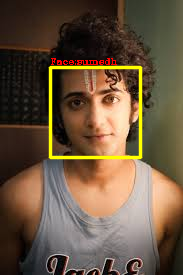

----------
8


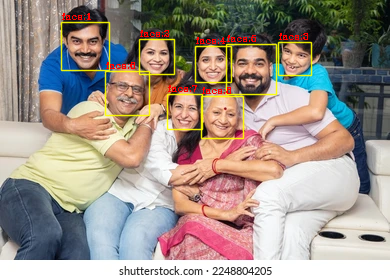

In [3]:
class voila_jones:

  def __init__(self,path):
    self.path=path
    self.Single_imagepath='/content/drive/MyDrive/VT/voila jones/sumedh.jpeg'
    self.Multi_Imagepath='/content/drive/MyDrive/VT/voila jones/family.jpg'

    self.haarcascade_file='/content/drive/MyDrive/VT/voila jones/haarcascade_frontalface_default.xml'
    self.math=cv2.CascadeClassifier(self.haarcascade_file)
    self.single_image=cv2.imread(self.Single_imagepath)
    self.multi_image=cv2.imread(self.Multi_Imagepath)

  def DetectSingle(self):
    try:
      co_ordinates,length=self.math.detectMultiScale2(self.single_image)
      #print(co_ordinates)
      print('----------')
      print(len(length))
      cor=co_ordinates[0]
      x1,y1,x2,y2=cor[0],cor[1],cor[2],cor[3]
      cv2.rectangle(self.single_image,(x1,y1),((x2+x1),(y2+y1)),(0,255,255),2,cv2.LINE_AA)
      cv2.putText(self.single_image,'Face:sumedh',(x1,y1-3), cv2.FONT_HERSHEY_COMPLEX,0.3,(0,0,255),1)
      cv2_imshow(self.single_image)
      cv2.waitKey()
      cv2.destroyAllWindows()
    except Exception as e :
      print('error in detect_single',e)

  def DetectMulti(self):
    try:
      co_ordinates,length=self.math.detectMultiScale2(self.multi_image)
      #print(co_ordinates)
      print('----------')
      print(len(length))
      count=1
      for i in range(len(length)):
        cor=co_ordinates[i]
        x1,y1,x2,y2=cor
        cv2.rectangle(self.multi_image,(x1,y1),((x2+x1),(y2+y1)),(0,255,255),1,cv2.LINE_AA)
        text='face:'+str(count)
        cv2.putText(self.multi_image,text,(x1,y1-3), cv2.FONT_HERSHEY_COMPLEX,0.3,(0,0,255),1)
        count += 1
      cv2_imshow(self.multi_image)
      cv2.waitKey()
      cv2.destroyAllWindows()
    except Exception as e :
      print('error in detect_multi',e)


if __name__ == '__main__':
    try:
        # Create an instance of the voila_jones class
        obj = voila_jones('/content/drive/MyDrive/VT/voila jones/sumedh.jpeg')
        obj2= voila_jones('/content/drive/MyDrive/VT/voila jones/family.jpg')

        # Call the DetectSingle() method on the instance
        obj.DetectSingle()
        obj2.DetectMulti()
    except Exception as e:
        print(f'error in main =', e)